## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 3 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

    
    
**Submission date: 9.2.24** \
Note: In case you need an extension for any reason, you can submit it by 14.2.24. \
No extra extensions will be given.
In case you are in miluim - please contact Yael directly.

**Your name: [Your Name]**
**Your ID: [Your ID]**

In this exercise, you will practice projection matrices and epipolar geometry related tasks.



## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex3.ipynb
   - images you use that were not given 
2. You should use Jupyter Notebook.
3. Name the zip file **'ex3_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. 
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.



In [2]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.10.11
Numpy version:  1.23.5


## <span style="color:blue">Section A: Projection

In this part you will go over projection matrix,  and use them to project 3D points to an image.



## <span style="color:blue">Part A1: Projection Matrix 
Fill the missing values, given partial values of the parameters of the left and right cameras.




**Right image parameters:**
The projection matrix of the right image:

In [4]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [5]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [6]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [7]:
OxR = MR[0, 2]
OyR = MR[1, 2]

Compute the right image scale factor which is consistent with MR:

In [8]:
SxR = MR[0, 0]
SyR = MR[1, 1]

Compute the right image intrinsic matrix which is consistent with MR:

In [9]:
MintR = np.array([[SxR, 0, OxR],
                  [0, SyR, OyR],
                  [0, 0, 1]])

 
**Left image parameters**
 
Left image center (principal point):

In [10]:
OxL = 320.798101 
OyL = 236.431326

Scale factor:

In [11]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [12]:
fL = 1

Translation vector w.r.t. the world origin:

In [13]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [14]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [15]:
MintL = np.array([[SxL, 0, OxL],
                  [0, SyL, OyL],
                  [0, 0, fL]])

Compute the projection matrix of the left camera

In [16]:
ML = np.dot(MintL, np.hstack((RL, -TL)))

Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [17]:
CL = null_space(ML)
CR= null_space(MR)

CL = CL / CL[-1]  # Normalize to make the last element 1
CR = CR / CR[-1]
# CR = np.array([0, 0, 0, 1])  # Right camera is at the origin in its own coordinate system

In [18]:
# print(CR.shape)
print(CL)

[[-173.29854444]
 [ -29.59579838]
 [  37.37401658]
 [   1.        ]]


Compute the distance between CL and CR:
    

In [19]:
D = np.linalg.norm(CL[:3] - CR[:3])

## <span style="color:blue">Part A2: Hands on Triangulation

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [20]:
# Your code for proj function
def proj(M,P):
    # Convert P to homogeneous coordinates
    P_homogeneous = np.append(P, 1)  # Append 1 to the end of P
    # Apply the projection matrix M
    p_homogeneous = np.dot(M, P_homogeneous)
    # Convert back to Euclidean coordinates
    p = p_homogeneous[:2] / p_homogeneous[2]
    return p

**<span style="color:blue">Answer Quesion:**\
Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
Note: the camera coordinate system rather than the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [21]:
PL = None
PR = None
QL = None
QR = None

In [22]:
print(ML)
print(MR)

[[ 1.12706850e+03  6.42591943e+01  1.70369375e+02  1.90853745e+05]
 [-3.26371433e+01  1.09133629e+03  2.48923256e+02  1.73397375e+04]
 [ 1.35100000e-01 -5.30000000e-03  9.90800000e-01 -1.37744000e+01]]
[[1.10050478e+03 0.00000000e+00 3.31023000e+02 0.00000000e+00]
 [0.00000000e+00 1.09776373e+03 2.59386377e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [23]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)

print("pL: ", pL)
print("pR: ", pR)
print("qL: ", qL)
print("qR: ", qR)

pL:  [208.2344204  324.55148575]
pR:  [202.63077567 305.12653262]
qL:  [290.0707005  316.20017115]
qR:  [347.5305717  314.27456375]


### Read two images and display the projections of P and Q on the two given images ###

(<matplotlib.image.AxesImage at 0x183daed9990>,
 Text(0.5, 1.0, 'Right image'),
 <matplotlib.collections.PathCollection at 0x183dcfa54e0>)

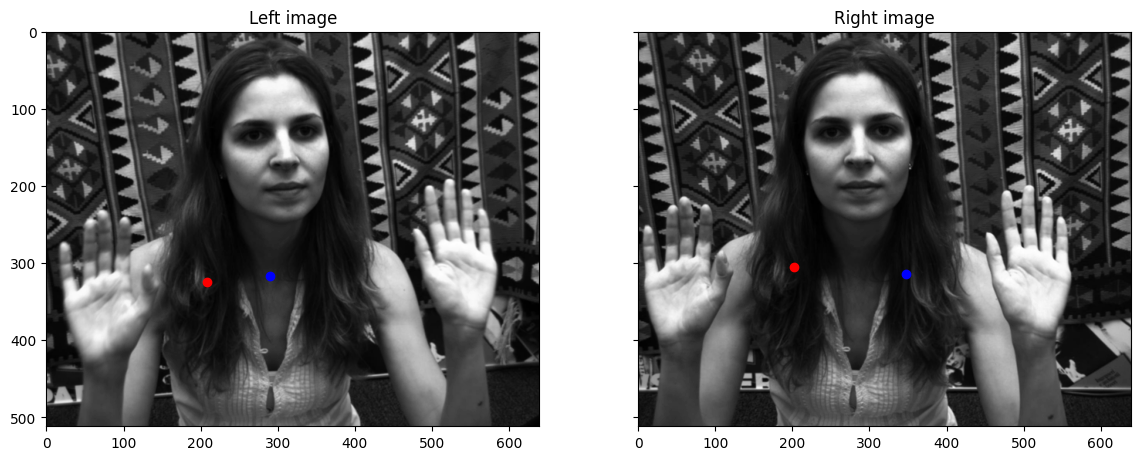

In [24]:
imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')

**<span style="color:blue"> Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**<span style="color:blue">Your answer:**\
   ...
    
    
    

## <span style="color:blue"> Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.\
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**<span style="color:blue">Answer Question:**
Can you double check if they are correct using F? If so, check it.


**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [25]:
import numpy as np

# Given rotation and translation for the left camera relative to the world origin
TL = -np.array([[178.2218, 18.8171, -13.7744]]).T
RL = np.array([[0.9891, 0.0602, -0.1346],
               [-0.0590, 0.9982, 0.0134],
               [0.1351, -0.0053, 0.9908]])

# Assuming MintL and MintR are defined as per previous definitions
# Here's a placeholder for demonstration
# MintL = np.array([...])  # Replace [...] with the actual MintL matrix
# MintR = np.array([...])  # Replace [...] with the actual MintR matrix

# Compute the skew-symmetric matrix of TL
T_x = np.array([[0, -TL[2, 0], TL[1, 0]],
                [TL[2, 0], 0, -TL[0, 0]],
                [-TL[1, 0], TL[0, 0], 0]])

# Compute the Essential Matrix E
E = T_x.dot(RL)

# Compute the Fundamental Matrix F
print(MintL.shape)
print(MintR.shape)
print(E.shape)
F = np.linalg.inv(MintL.T).dot(E).dot(np.linalg.inv(MintR))

# Normalizing F by its last singular value for improved precision
U, S, Vt = np.linalg.svd(F)
S[-1] = 0
F_normalized = U.dot(np.diag(S)).dot(Vt)

print("Essential Matrix E:\n", E)
print("Fundamental Matrix F:\n", F_normalized)



eL = MR @ CL
eR = ML @ CR
F = F_normalized

(3, 3)
(3, 3)
(3, 3)
Essential Matrix E:
 [[-1.72950061e+00 -1.36498754e+01 -1.88285596e+01]
 [ 3.77020242e+01 -1.15356660e-01  1.74728125e+02]
 [ 2.91270798e+01 -1.76768211e+02 -4.92095378e+00]]
Fundamental Matrix F:
 [[-1.43432782e-06 -1.13485257e-05 -1.37660449e-02]
 [ 3.12992065e-05 -9.60051179e-08  1.49297415e-01]
 [ 1.95270347e-02 -1.57362450e-01 -2.79672837e+00]]


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

In [34]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt

imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data: 
    # Convert point to homogeneous coordinates
    point_hom = np.array([x[0], x[1], 1])
    # Calculate corresponding epipolar line in the left image
    print(f"F: {F}")
    print(f"point_hom: {point_hom}")
    epipolar_line = np.dot(F, point_hom)
    # Plot the epipolar line on the left image
    # Compute two points (at x=0 and x=max) on the line to plot it
    x_vals = [0, imL.shape[1]]
    y_vals = [-(epipolar_line[2] + epipolar_line[0]*x)/epipolar_line[1] for x in x_vals]
    ax1.plot(x_vals, y_vals)
    ax2.plot(x_vals, y_vals)
    # ax1.plot(x_vals, y_vals)

plt.show()
    

F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [286.5267281 169.0280369 1.0000000]
F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [472.0972350 215.7450876 1.0000000]
F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [459.1202765 262.4621382 1.0000000]


In [27]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

##  <span style="color:blue">Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


In [28]:
# !pip uninstall opencv-python
# !pip install opencv-contrib-python

(<matplotlib.image.AxesImage at 0x183ddcd7190>, Text(0.5, 1.0, 'Matches'))

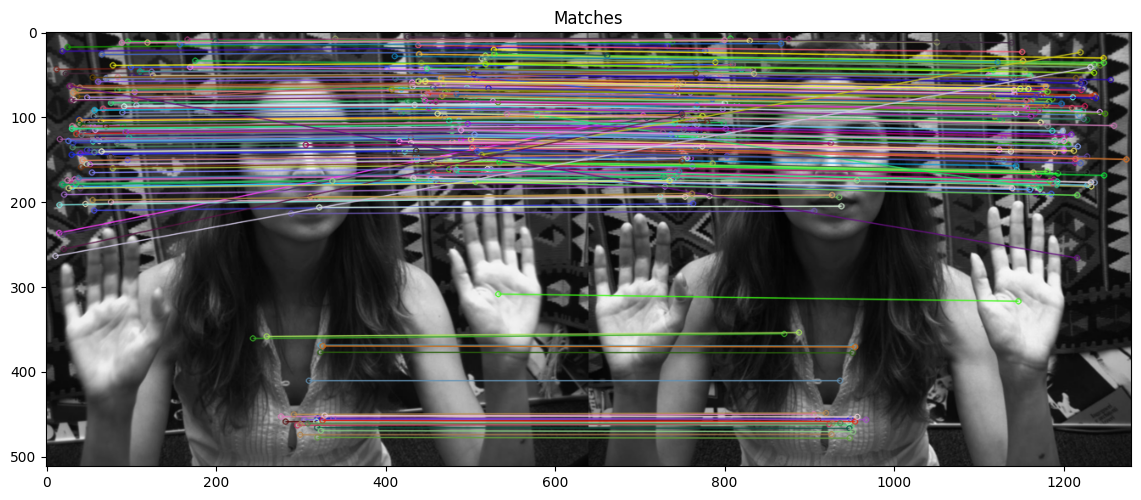

In [35]:
%matplotlib inline
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

<span style="color:blue"> Not for submission:

    Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [30]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [31]:
np.set_printoptions(formatter={'float' : '{:0.7f}'.format})
print(F_calc.T)
print(F)

[[0.0000006 -0.0000025 0.0041812]
 [-0.0000079 0.0000013 -0.0819637]
 [-0.0069284 0.0838522 1.0000000]]
[[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space 

**<span style="color:blue">Answer Question:**\
    Do you see any differences?
    
**<span style="color:blue">Your answer:**\
    ...

In [32]:

# This sould open a new figure window outside of jupyter notebook
%matplotlib qt

imL = cv2.imread('left1.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right1.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data: 
    # Convert point to homogeneous coordinates
    point_hom = np.array([x[0], x[1], 1])
    # Calculate corresponding epipolar line in the left image
    print(f"F: {F_calc}")
    print(f"point_hom: {point_hom}")
    epipolar_line = np.dot(F_calc, point_hom)
    # Plot the epipolar line on the left image
    # Compute two points (at x=0 and x=max) on the line to plot it
    x_vals = [0, imL.shape[1]]
    y_vals = [-(epipolar_line[2] + epipolar_line[0]*x)/epipolar_line[1] for x in x_vals]
    ax1.plot(x_vals, y_vals)
    ax2.plot(x_vals, y_vals)
    # ax1.plot(x_vals, y_vals)

plt.show()
    

TypeError: Image data of dtype object cannot be converted to float

### <span style="color:blue"> Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit: 5 corresponding epipolar lines overlayed on   your pair of images.

(20, 1, 2)


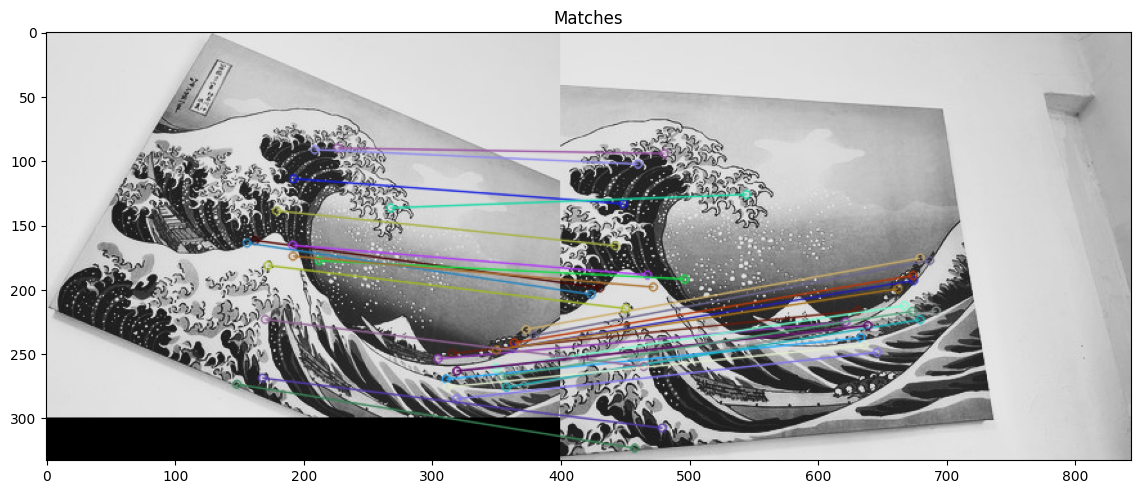

In [ ]:
%matplotlib inline
imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:30], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

pts1=np.array(pts1)
pts2=np.array(pts2)
pts1 =pts1[:, np.newaxis, :]
pts2 =pts2[:, np.newaxis, :]
# cut pts1 to 20 points
pts1 = pts1[:20]
pts2 = pts2[:20]
print(pts1.shape)


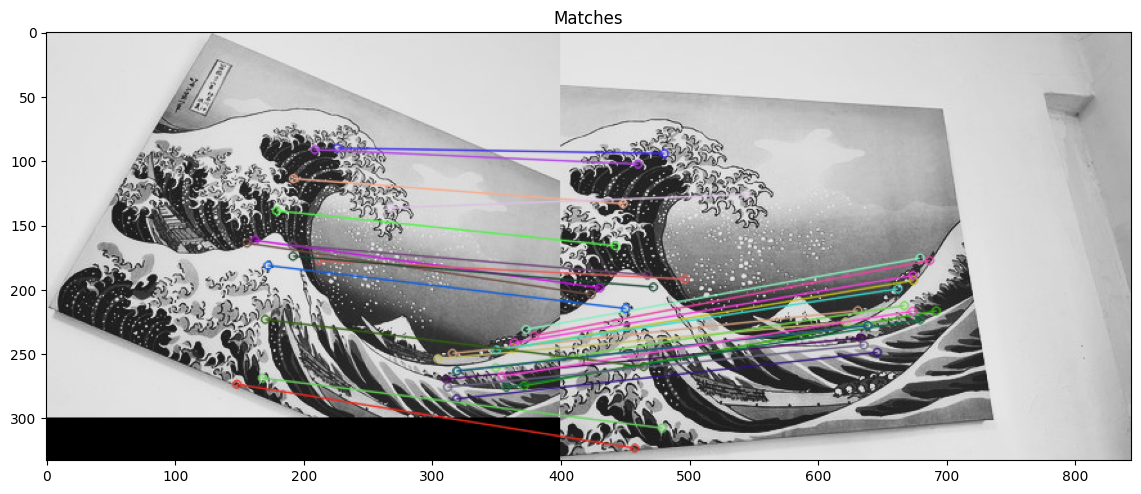

In [ ]:
%matplotlib inline
imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:30], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

pts1=np.array(pts1)
pts2=np.array(pts2)
pts1 =pts1[:, np.newaxis, :]
pts2 =pts2[:, np.newaxis, :]
# cut pts1 to 20 points
pts1 = pts1[:10]
pts2 = pts2[:10]
# print(pts1.shape)


[[ 8.51598968e-06 -2.02256281e-05  1.19710191e-03]
 [ 2.11874065e-05  6.83322828e-06 -7.62921790e-03]
 [-5.08553558e-03  2.83843735e-03  1.00000000e+00]]


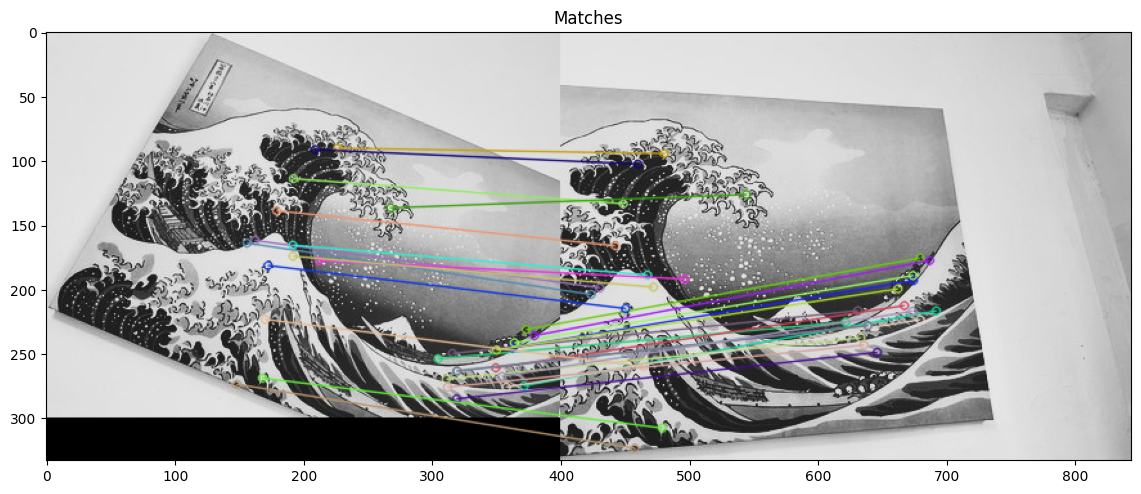

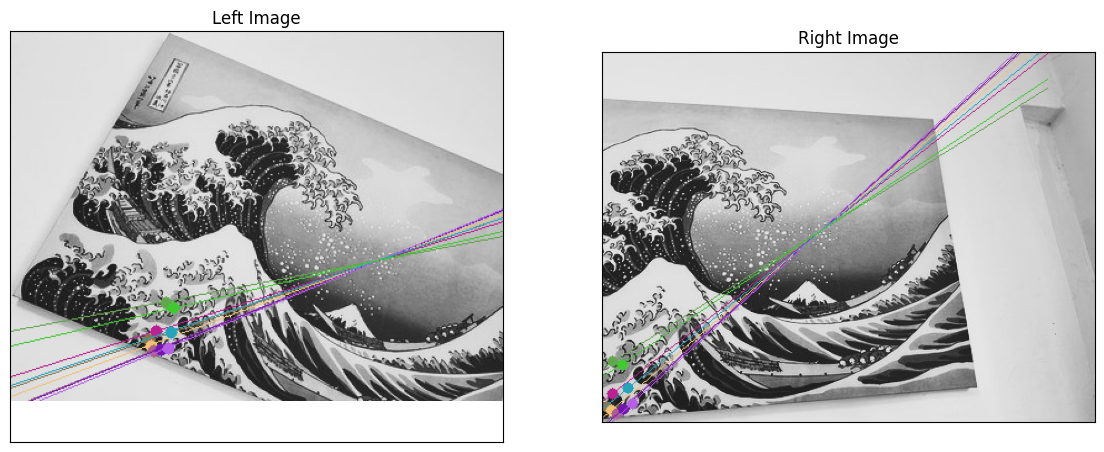

In [ ]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib inline
imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        
pts1 = np.int32(np.round([kp1[m.queryIdx].pt for m in matching]).reshape(-1,1,2))
pts2 = np.int32(np.round([kp2[m.trainIdx].pt for m in matching]).reshape(-1,1,2))


# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:30], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

pts1=np.array(pts1)
pts2=np.array(pts2)
pts1 =pts1[:, np.newaxis, :]
pts2 =pts2[:, np.newaxis, :]
# cut pts1 to 20 points
pts1 = pts1[:10]
pts2 = pts2[:10]
# print(pts1.shape)

    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')
print(F)
w = imL.shape[1]
for i in range(len(pts1)):
    color = tuple(np.random.randint(0, 255, 3).tolist())

    image1Final = cv2.circle(imL, tuple(map(int, pts1[i].ravel())), 2, color, 5)
    image2Final = cv2.circle(imR, tuple(map(int, pts2[i].ravel())), 2, color, 5)

    line2 = cv2.computeCorrespondEpilines(pts1[i], 1, F)
    line1 = cv2.computeCorrespondEpilines(pts2[i], 2, F)


    p1 = map(int, [0, -line1.ravel()[2] / line1.ravel()[1]])
    p2 = map(int, [w, -(line1.ravel()[2] + line1.ravel()[0] * w) / line1.ravel()[1]])
    p3 = map(int, [0, -line2.ravel()[2] / line2.ravel()[1]])
    p4 = map(int, [w, -(line2.ravel()[2] + line2.ravel()[0] * w) / line2.ravel()[1]])

    # Draw epilines on corresponding images
    image1Final = cv2.line(image1Final, tuple(p1), tuple(p2), color, 1)
    image2Final = cv2.line(image2Final, tuple(p3), tuple(p4), color, 1)

# Display the left image with colored epipolar lines
plt.subplot(121), plt.imshow(image1Final, cmap='gray')
plt.title('Left Image'), plt.xticks([]), plt.yticks([])

# Display the right image with colored epipolar lines
plt.subplot(122), plt.imshow(image2Final, cmap='gray')
plt.title('Right Image'), plt.xticks([]), plt.yticks([])

plt.show()

[[(36.42435836791992, 211.8279571533203), (35.944007873535156, 119.60347747802734), < cv2.DMatch 0000015BC71AFC70>], [(65.57929992675781, 138.1576690673828), (85.0389175415039, 105.11466217041016), < cv2.DMatch 0000015BC71AF0D0>], [(65.57929992675781, 138.1576690673828), (85.0389175415039, 105.11466217041016), < cv2.DMatch 0000015BC71AF890>], [(98.28020477294922, 77.86119079589844), (274.2017822265625, 193.1614227294922), < cv2.DMatch 0000015BC88815D0>], [(111.18216705322266, 212.08778381347656), (27.854551315307617, 242.705322265625), < cv2.DMatch 0000015BC8880DF0>]]
[(36.42435836791992, 211.8279571533203), (65.57929992675781, 138.1576690673828), (65.57929992675781, 138.1576690673828), (98.28020477294922, 77.86119079589844), (111.18216705322266, 212.08778381347656)]
[(35.944007873535156, 119.60347747802734), (85.0389175415039, 105.11466217041016), (85.0389175415039, 105.11466217041016), (274.2017822265625, 193.1614227294922), (27.854551315307617, 242.705322265625)]
[[(315.696990966796

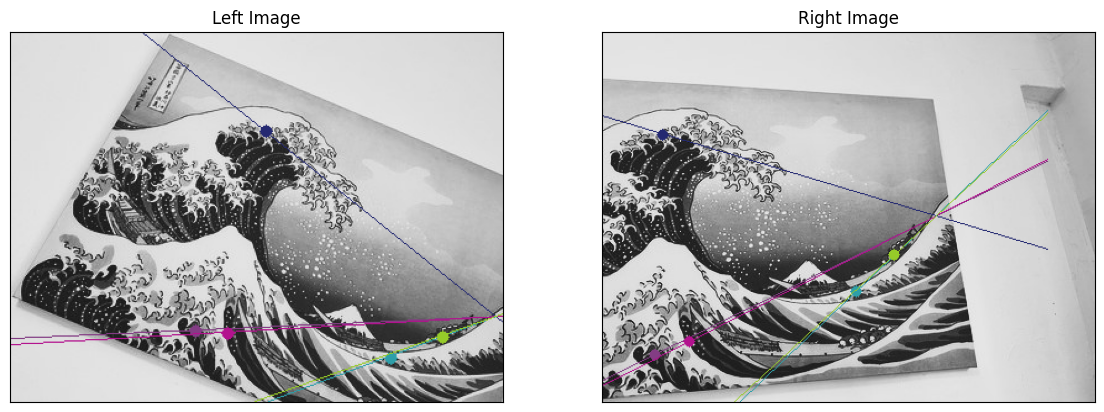

In [ ]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib inline
imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
matching_indices = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        matching_indices.append([kp1[m.queryIdx].pt, kp2[m.trainIdx].pt, m])

print(matching_indices[:5])
print(pts1[:5])
print(pts2[:5])

# sort matching_indices by distance
matching_indices = sorted(matching_indices, key = lambda x:x[2].distance)
print(matching_indices[:5])
# get the first 10 matching indices
matching_indices = matching_indices[:5]
# put the matching indices into pts1 and pts2
pts1 = [x[0] for x in matching_indices]
pts2 = [x[1] for x in matching_indices]
print(pts1)


pts1 = np.int32(np.round([kp1[m.queryIdx].pt for m in matching]).reshape(-1,1,2))
pts2 = np.int32(np.round([kp2[m.trainIdx].pt for m in matching]).reshape(-1,1,2))

# Getting Fundamental matrix after applying RANSAC on
# well matched keypoints on both images 
# F, mask = cv2.findFundamentalMat(ptsImage1,ptsImage2,cv2.RANSAC,1)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
print(F)
# Get num inlier matches after applying RANSAC
num = 5
matchesMask = mask.ravel().tolist()
indices = np.where(np.array(matchesMask) == 1)[0]
np.random.shuffle(indices)
indices = indices[:num]
matchesMask = [1 if i in indices else 0 for i in range(len(matchesMask))]




inlierImage = cv2.drawMatches(imL,kp1,imR,kp2,
                              matching,None,matchesMask = matchesMask,flags = 2)

# Applying mask on the keypoints to get 10 inlier pairs
pts1 = pts1[np.array(matchesMask).ravel() == 1]
pts2 = pts2[np.array(matchesMask).ravel() == 1]


w = imL.shape[1]
for i in range(len(pts1)):
    color = tuple(np.random.randint(0, 255, 3).tolist())

    image1Final = cv2.circle(imL, tuple(map(int, pts1[i].ravel())), 2, color, 5)
    image2Final = cv2.circle(imR, tuple(map(int, pts2[i].ravel())), 2, color, 5)

    line2 = cv2.computeCorrespondEpilines(pts1[i], 1, F)
    line1 = cv2.computeCorrespondEpilines(pts2[i], 2, F)

    # Compute 2 sample points on each line for plotting
    p1 = map(int, [0, -line1.ravel()[2] / line1.ravel()[1]])
    p2 = map(int, [w, -(line1.ravel()[2] + line1.ravel()[0] * w) / line1.ravel()[1]])
    p3 = map(int, [0, -line2.ravel()[2] / line2.ravel()[1]])
    p4 = map(int, [w, -(line2.ravel()[2] + line2.ravel()[0] * w) / line2.ravel()[1]])

    # Draw epilines on corresponding images
    image1Final = cv2.line(image1Final, tuple(p1), tuple(p2), color, 1)
    image2Final = cv2.line(image2Final, tuple(p3), tuple(p4), color, 1)

# Display the left image with colored epipolar lines
plt.subplot(121), plt.imshow(image1Final, cmap='gray')
plt.title('Left Image'), plt.xticks([]), plt.yticks([])

# Display the right image with colored epipolar lines
plt.subplot(122), plt.imshow(image2Final, cmap='gray')
plt.title('Right Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# Setting up program
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# Setting seed for reproducibility
UBIT = 'damirtha'
np.random.seed(sum([ord(c) for c in UBIT]))

def getInliers(mask, num=10):
    matchesMask = mask.ravel().tolist()
    indices = []
    for ind in range(len(matchesMask)):
        if matchesMask[ind] == 1:
            indices.append(ind)
    matchesMask = [0]*len(matchesMask)
    np.random.shuffle(indices)
    indices = indices[:num]
    for ind in indices:
            matchesMask[ind] = 1
    return matchesMask

def getInliers_vectorized(mask, num=10):
    # does the same thing as getInliers but in a vectorized way
    matchesMask = mask.ravel().tolist()
    indices = np.where(np.array(matchesMask) == 1)[0]
    np.random.shuffle(indices)
    indices = indices[:num]
    matchesMask = [1 if i in indices else 0 for i in range(len(matchesMask))]
    return matchesMask


def applySIFT(image):
    
    # Creating SIFT object, which will be used for applying SIFT on images
    sift = cv2.xfeatures2d.SIFT_create()

    # Detecting keypoints and computing keypoint descriptors for the inout images
    keypointsImage, descriptorImage = sift.detectAndCompute(image,None)
    
    return keypointsImage, descriptorImage

# Function to get good matches, given feature descriptors
def getGoodMatches(descriptorImage1, descriptorImage2):
    
    # Applying Brute Force matcher for getting K nearest neighbours for 
    # each keypoint using respective descriptors
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptorImage1, descriptorImage2, k=2)

    goodList = []
    good = []

    # Filtering good matches based on a distance of 0.75 between 
    # keypoint pairs in 2 images
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            goodList.append([m])
            good.append(m)
            
    return goodList, good

In [ ]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt




imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')


image1=imL
image2=imR

# Detecting keypoints and computing keypoint descriptors for the 2 inout images
sift = cv2.xfeatures2d.SIFT_create()
keypointsImage1, descriptorImage1 = sift.detectAndCompute(image1,None)
keypointsImage2, descriptorImage2 = sift.detectAndCompute(image2,None)
# keypointsImage1, descriptorImage1 = applySIFT(image1)
# keypointsImage2, descriptorImage2 = applySIFT(image2)

# Get good matches using KNN algorithm between kepoint descriptors of 
# 2 input images
# goodList, good = getGoodMatches(descriptorImage1, descriptorImage2)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
good = []
print(good)
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        # pts2.append(kp2[m.trainIdx].pt)
        # pts1.append(kp1[m.queryIdx].pt)
        good.append(m)
        

# Getting keypoint locations as an array of (x,y) pixel coordinates
pts1 = np.int32(np.round([keypointsImage1[m.queryIdx].pt for m in good]).reshape(-1,1,2))
pts2 = np.int32(np.round([keypointsImage2[m.trainIdx].pt for m in good]).reshape(-1,1,2))

# Getting Fundamental matrix after applying RANSAC on
# well matched keypoints on both images 
# F, mask = cv2.findFundamentalMat(ptsImage1,ptsImage2,cv2.RANSAC,1)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
print(F)
# Get 10 inlier matches after applying RANSAC
matchesMask = getInliers(mask, 10)
inlierImage = cv2.drawMatches(image1,keypointsImage1,image2,keypointsImage2,
                              good,None,matchesMask = matchesMask,flags = 2)

# Applying mask on the keypoints to get 10 inlier pairs
pts1 = pts1[np.array(matchesMask).ravel() == 1]
pts2 = pts2[np.array(matchesMask).ravel() == 1]
# image2Final = None
# print(ptsImage1.shape, ptsImage2.shape)
# print(ptsImage1[0], ptsImage2[0])
# print(pts1.shape, pts2.shape)
# print(pts1[0], pts2[0])
pts1 = pts1
pts2 = pts2

w = imL.shape[1]
for i in range(len(pts1)):
    color = tuple(np.random.randint(0, 255, 3).tolist())

    image1Final = cv2.circle(image1, tuple(map(int, pts1[i].ravel())), 2, color, 5)
    image2Final = cv2.circle(image2, tuple(map(int, pts2[i].ravel())), 2, color, 5)

    line2 = cv2.computeCorrespondEpilines(pts1[i], 1, F)
    line1 = cv2.computeCorrespondEpilines(pts2[i], 2, F)

    # Compute 2 sample points on each line for plotting
    p1 = map(int, [0, -line1.ravel()[2] / line1.ravel()[1]])
    p2 = map(int, [w, -(line1.ravel()[2] + line1.ravel()[0] * w) / line1.ravel()[1]])
    p3 = map(int, [0, -line2.ravel()[2] / line2.ravel()[1]])
    p4 = map(int, [w, -(line2.ravel()[2] + line2.ravel()[0] * w) / line2.ravel()[1]])

    # Draw epilines on corresponding images
    image1Final = cv2.line(image1Final, tuple(p1), tuple(p2), color, 1)
    image2Final = cv2.line(image2Final, tuple(p3), tuple(p4), color, 1)

# Display the left image with colored epipolar lines
plt.subplot(121), plt.imshow(image1Final, cmap='gray')
plt.title('Left Image'), plt.xticks([]), plt.yticks([])

# Display the right image with colored epipolar lines
plt.subplot(122), plt.imshow(image2Final, cmap='gray')
plt.title('Right Image'), plt.xticks([]), plt.yticks([])

plt.show()

[]
[[ 2.32275206e-05 -6.15803725e-05 -1.55990572e-04]
 [ 7.23335734e-05  2.27580463e-05 -1.15509991e-02]
 [-5.43828795e-03 -4.26157546e-03  1.00000000e+00]]


##  <span style="color:blue"> Part D: Answer the following question
    
Consider two rectified images that are related by translation along the $y$-axis.

1. What is the epipolar line on the bottom image for the point $(x, y)$ on the top image?
2. What is the Fundamental matrix of the pair of images? Explain your answer and prove that it is consistent with your answer to (1).
3. Where is the epipole of the top image? Prove your answer formally using your answer to (2).
    
    


**<span style="color:blue"> Answer:**

1. In the case of a translation along the y-axis, the corresponding points in the rectified images have the same x-coordinates, but they differ in the y-coordinates.
Therefore, the epipolar line in the bottom image for a point (x,y) in the top image will be a vertical line passing through the point (x,y) in the bottom image.

result= -7.105427357601002e-15
[[-0.00000000 -0.00465274 -0.18541887]
 [0.00465274 0.00000000 -0.02000000]
 [-0.04721803 0.02000000 1.00000000]]

 [[0.00000000 0.00000000 0.00000000]
 [0.00000000 0.00000000 -0.02000000]
 [0.00000000 0.02000000 0.00000000]]
-1.0


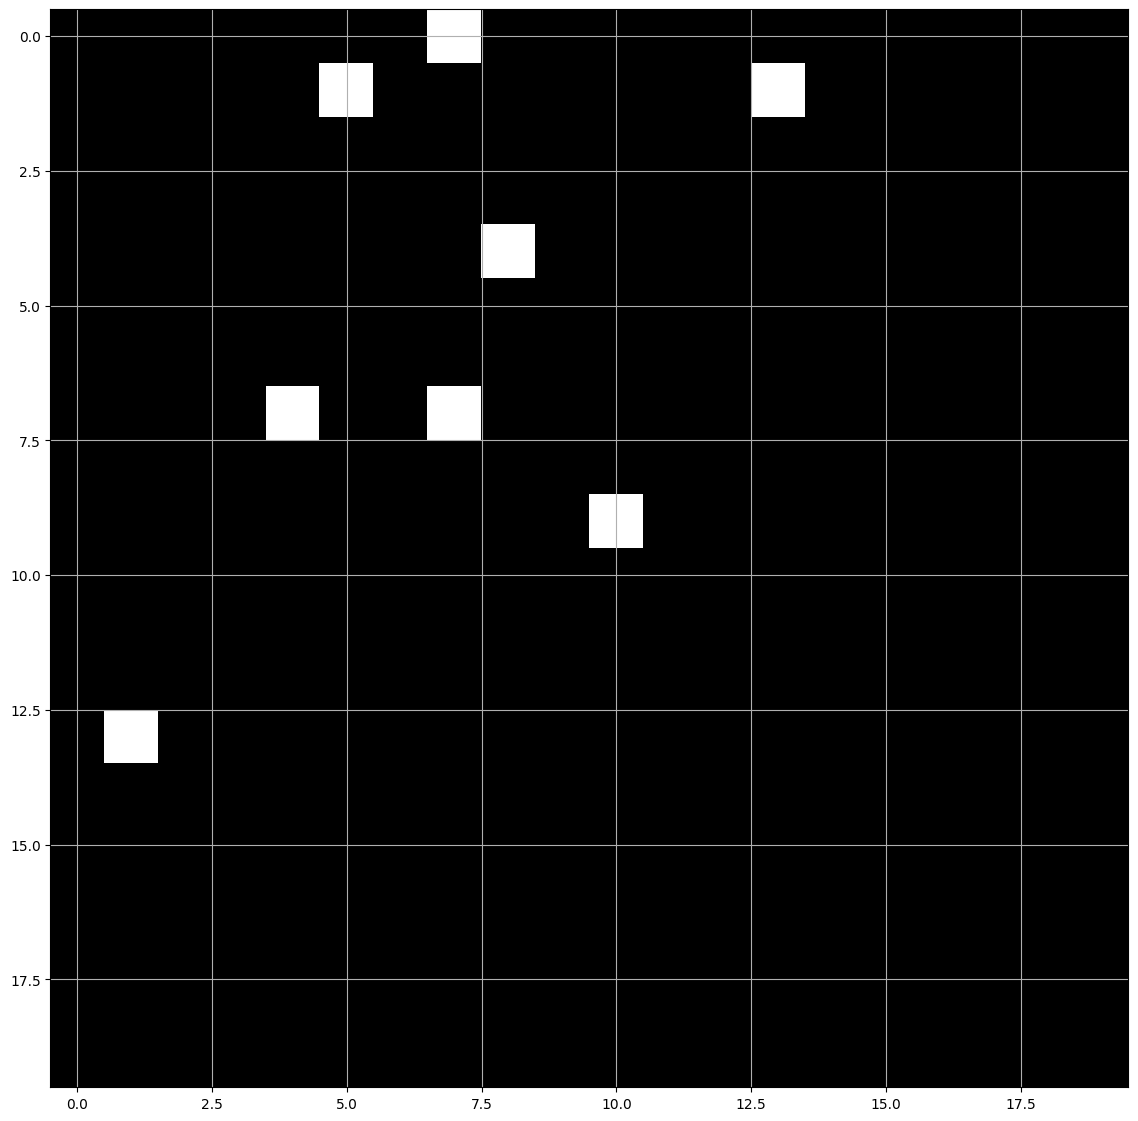

In [ ]:
%matplotlib inline
# format np to be 2 decimels after the point
np.set_printoptions(formatter={'float' : '{:0.8f}'.format})

d=50
a=3
b=2

F_up=np.array([[0, 0, 0],
               [0, 0, -1/d],
               [0, 1/d, 0]])

# F_up=np.array([[0, a, b],
#                [-a, 0, 1/d],
#                [-d*a-b, -1/d, 1]])

u_up = np.array([100, 50+d])
u_down = np.array([100, 50])

# display u_up and u_down on a blank image, make sure to color only the points themselves with radius 0
blank = np.zeros((20,20))
blank = cv2.circle(blank, (u_up[0],u_up[1]), 0, 1, -1)
blank = cv2.circle(blank, (u_down[0],u_down[1]), 0, 1, -1)
# add 1 to the vectors
u_up = np.append(u_up, 1)
u_down = np.append(u_down, 1)

random_points = np.random.randint(0, 15, size=(8,2))
# now give a different array with same points but +5 for each y axis
random_points2 = random_points.copy()
random_points2[:,1] += d
# now display the points on a blank image, the upper points should be red and the lower points should be blue
blank = np.zeros((20,20))
for point in random_points:
    blank = cv2.circle(blank, (point[0],point[1]), 0, 1, -1)
for point in random_points2:
    blank = cv2.circle(blank, (point[0],point[1]), 0, 2, -1)
plt.imshow(blank, cmap='gray')
# add grid lines to the plot
plt.grid(True)

# add 1 to the vectors random_points and random_points2
random_points = np.append(random_points, np.ones((8,1)), axis=1)
random_points2 = np.append(random_points2, np.ones((8,1)), axis=1)
# print(random_points[0], random_points2[0])
# now get their fundamental matrix
# F, mask = cv2.findFundamentalMat(random_points,random_points2,cv2.RANSAC,1)
F, mask = cv2.findFundamentalMat(random_points,random_points2, cv2.FM_7POINT)
det = np.linalg.det(F)
# F=F/det
result = np.dot(u_up.T, np.dot(F, u_down))
print("result=",result)
print(F)
print("\n",F_up)
print(np.dot(u_up.T, np.dot(F_up, u_down)))



In [ ]:
from sympy import symbols, Eq, solve

# Define the variables
f21, f31, f12, f32, f13, d = symbols('f21 f31 f12 f32 f13 d')

# Define the equations
# provide this equation with different x,y,  5 times Eq(y*x*f21 + x*f31 + y*x*f12 + x*f12*d + f32*d + x*f13 + 1, 0),

x = [3, 1, 8, 6, 9, 2,3]
y = [7, 5, 2, 4, 1, 9, 7]
equations = [
    Eq(y[0]*x[0]*f21 + x[0]*f31 + y[0]*x[0]*f12 + x[0]*f12*d + f32*d + x[0]*f13 + 1, 0),
    Eq(y[1]*x[1]*f21 + x[1]*f31 + y[1]*x[1]*f12 + x[1]*f12*d + f32*d + x[1]*f13 + 1, 0),
    Eq(y[2]*x[2]*f21 + x[2]*f31 + y[2]*x[2]*f12 + x[2]*f12*d + f32*d + x[2]*f13 + 1, 0),
    Eq(y[3]*x[3]*f21 + x[3]*f31 + y[3]*x[3]*f12 + x[3]*f12*d + f32*d + x[3]*f13 + 1, 0),
    Eq(y[4]*x[4]*f21 + x[4]*f31 + y[4]*x[4]*f12 + x[4]*f12*d + f32*d + x[4]*f13 + 1, 0),
    Eq(y[5]*x[5]*f21 + x[5]*f31 + y[5]*x[5]*f12 + x[5]*f12*d + f32*d + x[5]*f13 + 1, 0),
    Eq(y[6]*x[6]*f21 + x[6]*f31 + y[6]*x[6]*f12 + x[6]*f12*d + f32*d + x[6]*f13 + 1, 0),

]

# Solve the system of equations
solution = solve(equations, (f21, f31, f12, f32, f13))
print(solution)

{f21: -f12, f31: -d*f12 - f13, f32: -1/d}


In [ ]:
F_up